# 🔎 Exploratory Data Analysis 1 (EDA)

## 📝 Introduction

Exploratory Data Analysis (EDA) is a crucial step in any data science project, as it allows us to better understand the structure, relationships, and patterns within the data before conducting any advanced modeling or analysis.

In this project, we will work with two main datasets:

1. **💓 Cardio Train Dataset**: This dataset contains information on various health indicators of individuals, such as age, gender, height, weight, blood pressure, cholesterol levels, and more. The goal is to explore these data points to identify potential correlations and patterns that could be useful in predicting cardiovascular diseases.

#### Data Description

The dataset is composed of three types of input features:

- *Objective*: Factual information.
- *Examination*: Results from medical examinations.
- *Subjective*: Information provided by the patient.

| Feature                    | Variable Type         | Variable      | Value Type                                                   |
|----------------------------|-----------------------|---------------|---------------------------------------------------------------|
| Age                        | Objective Feature     | age           | int (days)                                                   |
| Height                     | Objective Feature     | height        | int (cm)                                                     |
| Weight                     | Objective Feature     | weight        | float (kg)                                                   |
| Gender                     | Objective Feature     | gender        | categorical code                                             |
| Systolic Blood Pressure    | Examination Feature   | ap_hi         | int                                                          |
| Diastolic Blood Pressure   | Examination Feature   | ap_lo         | int                                                          |
| Cholesterol                | Examination Feature   | cholesterol   | 1: normal, 2: above normal, 3: well above normal             |
| Glucose                    | Examination Feature   | gluc          | 1: normal, 2: above normal, 3: well above normal             |
| Smoking                    | Subjective Feature    | smoke         | binary                                                       |
| Alcohol Intake             | Subjective Feature    | alco          | binary                                                       |
| Physical Activity          | Subjective Feature    | active        | binary                                                       |
| Cardiovascular Disease     | Target Variable       | cardio        | binary                                                       |

All dataset values were collected at the time of the medical examination.

### 🎯 Objectives of the EDA

- **📊 Understanding Data Distribution**: Analyze the distribution of individual variables to identify outliers, missing values, and understand the nature of the data.
- **🔗 Exploring Relationships Between Variables**: Investigate possible correlations between different variables that might be useful for subsequent modeling.
- **🔍 Identifying Patterns and Trends**: Search for patterns and trends in the data that could reveal relevant information for the project’s objectives.
- **🛠️ Data Preparation**: Perform the necessary transformations to clean and prepare the data for analysis and modeling.



---

## 📥 Data Loading


In [2]:
import sys
import os
from dotenv import load_dotenv

load_dotenv()
work_dir = os.getenv('WORK_DIR')


sys.path.append(work_dir)

In [3]:
from src.model.models import CardioTrain
from src.database.dbconnection import getconnection


In [4]:
from sqlalchemy.orm import sessionmaker, declarative_base, aliased
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams


In [5]:
engine = getconnection()
Session = sessionmaker(bind=engine)
session = Session()

Conected successfully to database postgres!


In [6]:
table = aliased(CardioTrain)
query = session.query(table).statement
df = pd.read_sql(query, engine, index_col=None)

## 📊 Statistical Summary

Univariate analysis.
- To understand all our variables, at first, we should look at their datatypes. We can do it with info() function:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [8]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


All features are numerical, 12 integers and 1 decimal number (weight). The second column gives us an idea how big is the dataset and how many non-null values are there for each field. We can use describe() to display sample statistics such as min, max, mean,std for each attribute:

In [9]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Age is measured in days, height is in centimeters. Let's look at the numerical variables and how are they spread among target class. For example, at what age does the number of people with CVD exceed the number of people without CVD?

## 🔍 Cleaning


### 1. Removal of Null Values

In [12]:
# Verificar valores nulos
null_values = df.isnull().sum()
print("Valores nulos por columna:\n", null_values)

# Eliminar filas con valores nulos
df_cleaned = df.dropna()


Valores nulos por columna:
 id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


### Univariate Data Cleaning
Adjusting Age and Gender Values

Age was converted from days to years.
Gender was converted to a binary format (0 for male, 1 for female).

In [10]:
# Convert age from days to years
df["age"] = df["age"] // 365

# Adjust gender values: 2 for male, 1 for female
df['gender'] = df['gender'].replace({2: 0, 1: 1})


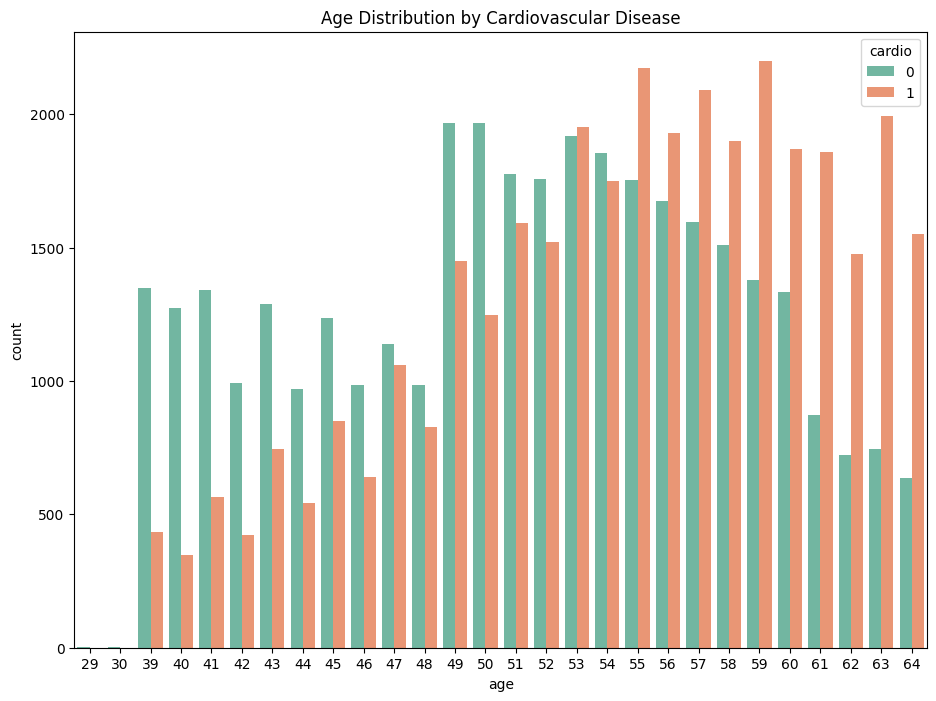

In [11]:
# Plot the distribution of age with respect to the target variable 'cardio'
rcParams['figure.figsize'] = 11, 8
sns.countplot(x='age', hue='cardio', data=df, palette="Set2")
plt.title('Age Distribution by Cardiovascular Disease')
plt.show()

It can be observed that people over 55 of age are more exposed to CVD. From the table above, we can see that there are outliers in ap_hi, ap_lo, weight and height. We will deal with them later.

Let's look at categorical variables in the dataset and their distribution:

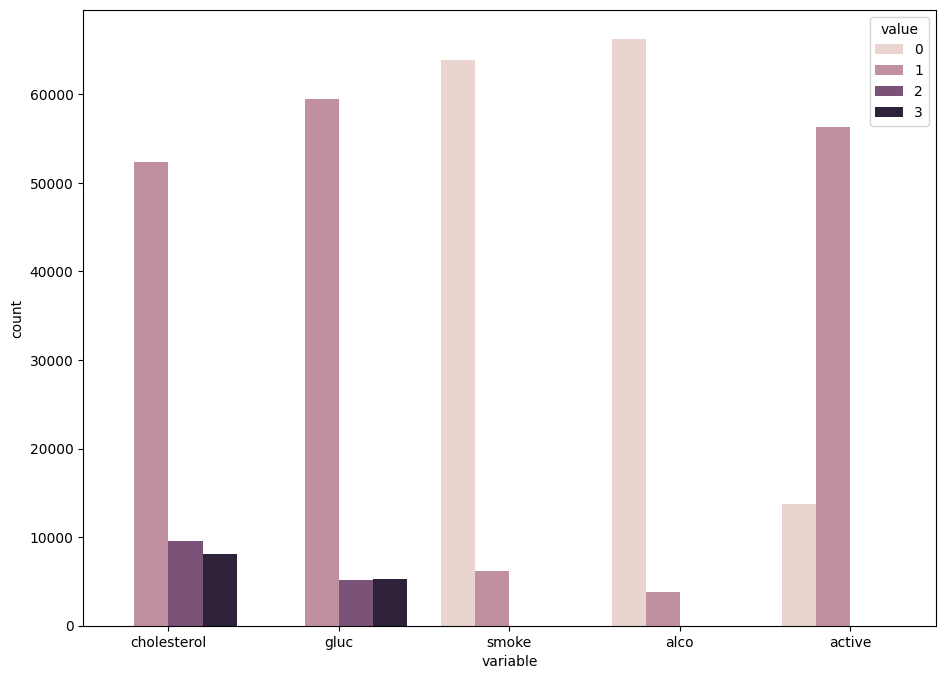

In [12]:
df_categorical = df.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical));

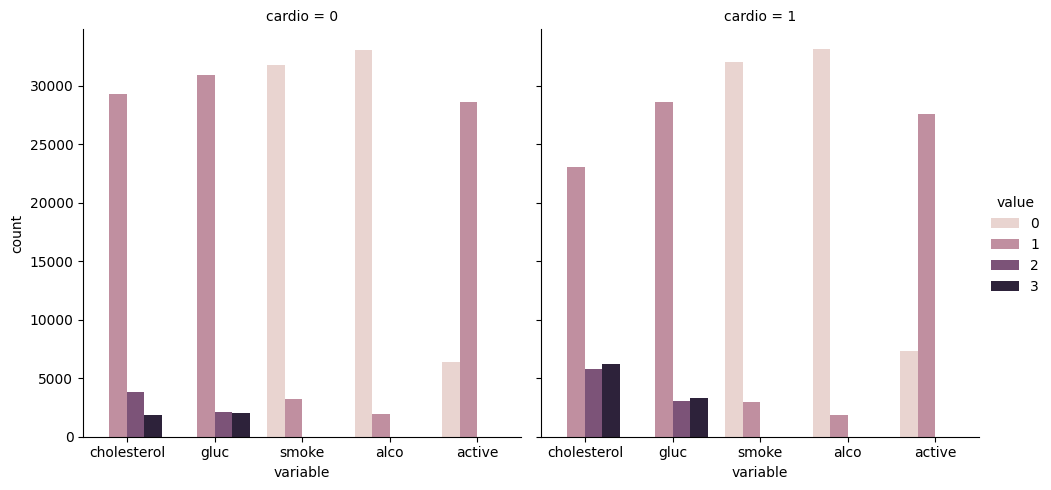

In [13]:
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",
                data=df_long, kind="count");

It can be clearly seen that patients with CVD have higher cholesterol and blood glucose level. And, generally speaking less active.

To figure out whether "1" stands for women or men in gender column, let's calculate the mean of height per gender. We assume that men are higher than women on average.

In [15]:
df.groupby('gender')['height'].mean()

gender
0    169.947895
1    161.355612
Name: height, dtype: float64

Average height for "0" gender is greater, than for "1" gender, therefore "1" stands for women. Let's see how many men and women presented in the dataset:

In [16]:
df['gender'].value_counts()

gender
1    45530
0    24470
Name: count, dtype: int64

Who more often report consuming alcohol - men or women?

In [17]:
df.groupby('gender')['alco'].sum()

gender
0    2603
1    1161
Name: alco, dtype: int64

So, men consume alcohol more frequently on average. Next, the target variables are balanced:`

In [24]:
df['cardio'].value_counts(normalize=True)

cardio
0    0.5003
1    0.4997
Name: proportion, dtype: float64

In [18]:
pd.crosstab(df['cardio'],df['gender'],normalize=True)

gender,0,1
cardio,,
0,0.172957,0.327343
1,0.176614,0.323086


In [26]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.338686
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.765294
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


If we look more closely to height and weight columns, we will notice that minimum height is 55 cm and minimum weight is 10 kg. That has to be an error, since minimum age is 10798 days, which equals to 29 years. On the other hand, the maximum height is 250 cm and the highest weight is 200 kg, which might be irrelevant, when generilizing data. To deal with these errors, we can remove outliers.

Let's remove weights and heights, that fall below 2.5% or above 97.5% of a given range.

In [19]:
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)


In addition, in some cases diastolic pressure is higher than systolic, which is also  incorrect. How many records are inaccurate in terms of blood pressure?

In [20]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 1082 cases


In [21]:
# Standardize blood pressure values and remove outliers
df['ap_hi'] = df['ap_hi'].abs()
df['ap_lo'] = df['ap_lo'].abs()
df.drop(df[df["ap_hi"] < 80].index, inplace=True)
df.drop(df[df["ap_hi"] > 250].index, inplace=True)
df.drop(df[df["ap_lo"] < 50].index, inplace=True)
df.drop(df[df["ap_lo"] > 150].index, inplace=True)

In [23]:
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)

In [26]:
# Remove records where systolic equals diastolic
df.drop(df[df["ap_hi"] == df["ap_lo"]].index, inplace=True)

Diastilic pressure is higher than systolic one in 0 cases


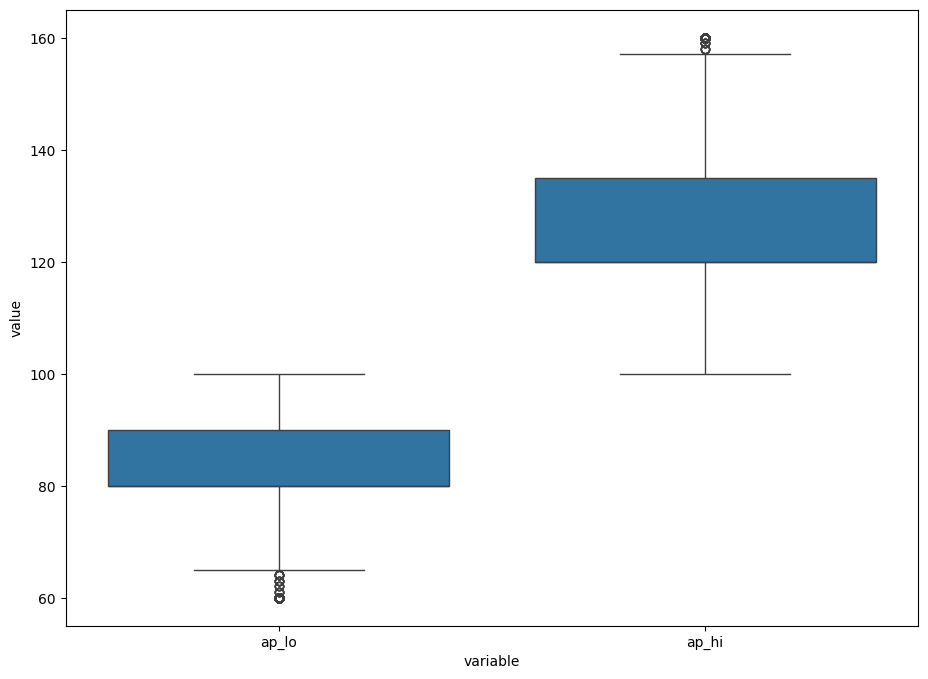

In [27]:
blood_pressure = df.loc[:,['ap_lo','ap_hi']]
sns.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

## 🔗 Feature Engineering

Body Mass Index (BMI) Calculation

A new feature, Body Mass Index (BMI), was created using the weight and height values.
BMI was then categorized into six classes: Anorexic, Underweight, Normal, Overweight, Obesity Class I, Obesity Class II, and Obesity Class III.

In [28]:
# Calculate BMI
df["bmi"] = df["weight"] * 10000 / (df["height"] ** 2)

# Categorize BMI
conditions = [
    (df["bmi"] <= 15),
    (df["bmi"] > 15) & (df["bmi"] <= 18.5),
    (df["bmi"] > 18.5) & (df["bmi"] <= 25),
    (df["bmi"] > 25) & (df["bmi"] <= 30),
    (df["bmi"] > 30) & (df["bmi"] <= 35),
    (df["bmi"] > 35) & (df["bmi"] <= 40),
    (df["bmi"] > 40)
]
bmi_class = [0, 1, 2, 3, 4, 5, 6]
df["bmi_class"] = np.select(conditions, bmi_class)


Blood Pressure Categorization

Blood pressure categories were created based on the systolic and diastolic values.

In [29]:
def categorize_blood_pressure(dataframe):
    systolic = dataframe['ap_hi']
    diastolic = dataframe['ap_lo']

    if systolic < 120 and diastolic < 80:
        return 0
    elif systolic < 130 and diastolic < 85:
        return 1
    elif (systolic >= 130 and systolic <= 139) or (diastolic >= 85 and diastolic <= 89):
        return 2
    elif (systolic >= 140 and systolic <= 159) or (diastolic >= 90 and diastolic <= 99):
        return 3
    elif (systolic >= 160 and systolic <= 179) or (diastolic >= 100 and diastolic <= 109):
        return 4
    elif systolic >= 180 or diastolic >= 110:
        return 5
    elif systolic >= 140 and systolic <= 160 and diastolic < 90:
        return 6
    elif systolic > 160 and diastolic < 90:
        return 7
    else:
        return -1  # For observations that don't meet any conditions

df['bp_cat'] = df.apply(categorize_blood_pressure, axis=1)


Pulse Pressure Calculation

A new feature, Pulse Pressure, was calculated by subtracting diastolic from systolic blood pressure.

In [30]:
# Calculate Pulse Pressure
df["pulse_press"] = df["ap_hi"] - df["ap_lo"]


The correlation matrix heatmap  provides a visual representation of the relationships between the various features in your dataset. Here's an interpretation of some of the key points from the heatmap:



## 📊 Data visualization

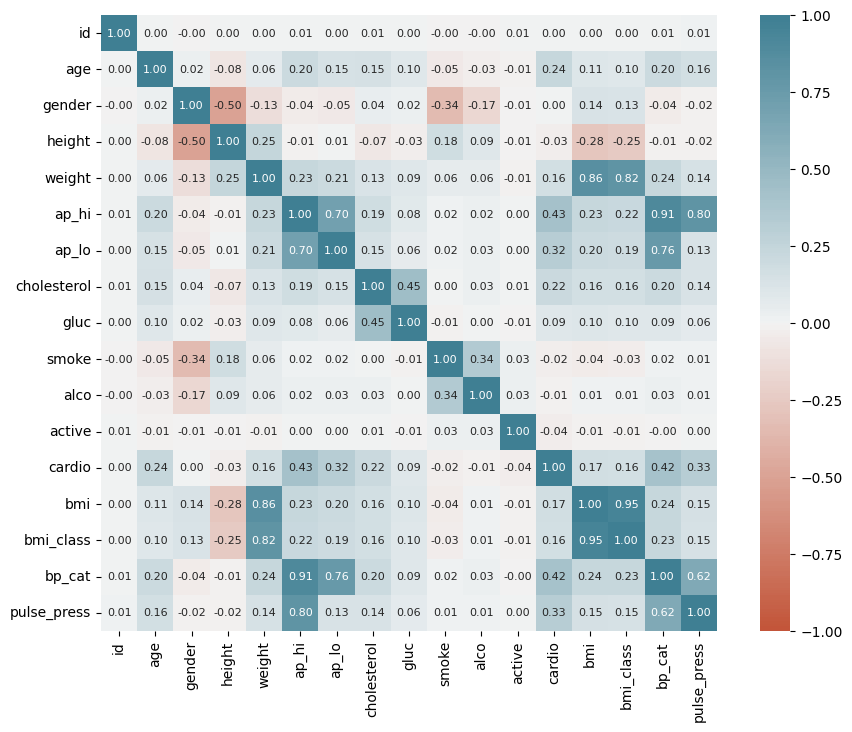

In [33]:
correlation = df.corr()
ax = sns.heatmap(
    correlation,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt='.2f',
    annot_kws={"size": 8}
)

#### Key Observations

1. **Strong Positive Correlations**:
   - **`ap_hi` (Systolic Blood Pressure) and `bp_cat` (Blood Pressure Category)**: These two variables have a strong positive correlation (0.76), which makes sense as the blood pressure category is derived from the systolic and diastolic blood pressure values.
   - **`weight` and `bmi` (Body Mass Index)**: There is a strong positive correlation (0.86) between weight and BMI, indicating that as weight increases, BMI also increases. This is expected since BMI is calculated using weight.
   - **`bmi_class` (BMI Classification) and `bmi`**: A very strong positive correlation (0.95) is observed, which is logical because BMI classification is directly derived from BMI values.

2. **Moderate Positive Correlations**:
   - **`cardio` (Cardiovascular Disease) and `ap_hi`/`ap_lo` (Blood Pressure Values)**: Both systolic (`ap_hi`, 0.43) and diastolic (`ap_lo`, 0.32) blood pressure values are moderately positively correlated with the presence of cardiovascular disease (`cardio`). This suggests that higher blood pressure values are associated with a higher likelihood of cardiovascular disease.
   - **`age` and `cardio`**: There is a moderate positive correlation (0.24) between age and cardiovascular disease, indicating that older individuals are more likely to have cardiovascular disease.

3. **Negative Correlations**:
   - **`height` and `gender`**: There's a moderate negative correlation (-0.50) between height and gender. This indicates that gender plays a role in height, with one gender (likely males) being taller on average.
   - **`height` and `bmi`**: There's a moderate negative correlation (-0.28) between height and BMI. Taller individuals tend to have lower BMI values, likely because BMI accounts for both height and weight in its calculation.

4. **Other Noteworthy Correlations**:
   - **`cholesterol` and `gluc` (Glucose Level)**: These two health indicators are moderately positively correlated (0.45). This suggests that individuals with higher cholesterol levels also tend to have higher glucose levels, which could be indicative of metabolic syndromes.
   - **`pulse_press` (Pulse Pressure) and `ap_hi`/`ap_lo`**: Pulse pressure, which is the difference between systolic and diastolic blood pressure, shows moderate correlations with both (`ap_hi` 0.33, `ap_lo` 0.19). This indicates that as the systolic or diastolic pressure increases, pulse pressure also tends to increase, though the correlation is stronger with systolic pressure.

#### Overall Interpretation

- **Predictive Insights**: The moderate to strong correlations between the `cardio` variable and features like `ap_hi`, `ap_lo`, `age`, and `bmi` suggest that these variables are important predictors of cardiovascular disease.
  
- **Feature Engineering**: The strong correlation between variables like `weight` and `bmi` or `bp_cat` and `ap_hi`/`ap_lo` reinforces the idea that derived features (like BMI or blood pressure categories) are meaningful and capture essential information that can help in predictive modeling.

- **Potential Multicollinearity**: The strong correlations between certain variables, such as `weight` and `bmi`, may indicate potential multicollinearity issues in a regression model, which could affect model performance and interpretability.

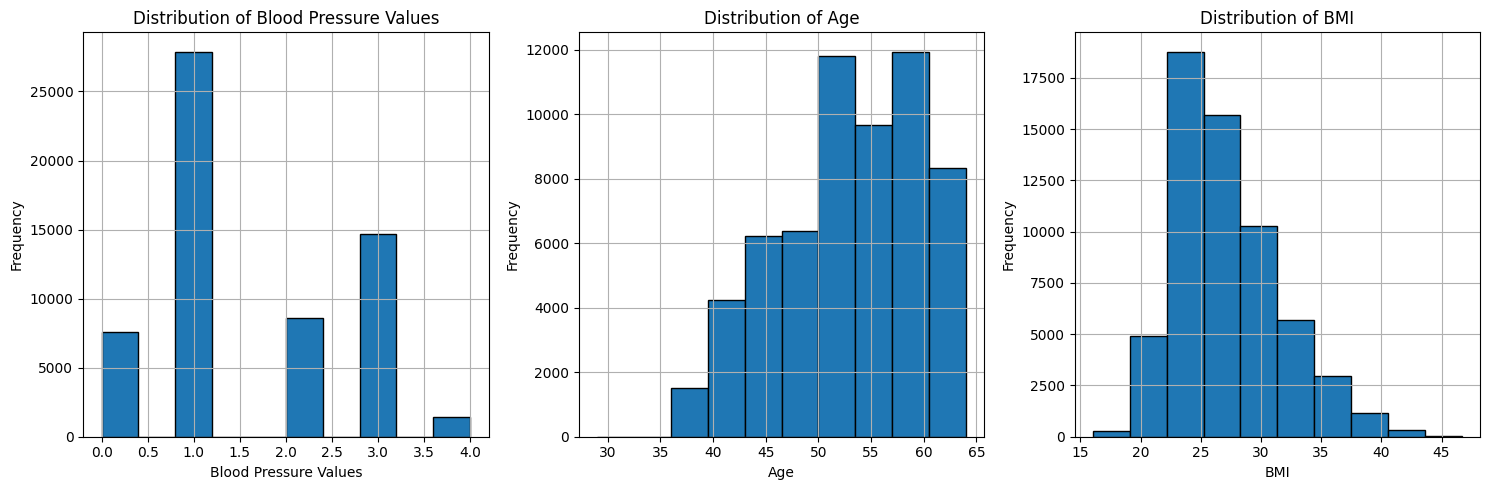

In [59]:
# Plotting distributions
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
df['bp_cat'].hist(edgecolor='black')
plt.title('Distribution of Blood Pressure Values')
plt.xlabel('Blood Pressure Values')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
df['age'].hist(edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
df['bmi'].hist(edgecolor='black')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


#### 1. **Distribution of Blood Pressure Values (`bp_cat`)**
- **Categories**:
  - The categories in `bp_cat` represent different ranges of blood pressure values, which were likely classified based on clinical guidelines.
- **Observation**:
  - The majority of individuals fall into category `1.0`, which likely represents normal or slightly elevated blood pressure.
  - There's a notable decrease in the number of individuals in higher categories, suggesting that fewer people have severe hypertension.
  - The category `0.0` likely represents individuals with blood pressure values that are considered optimal or below the threshold for hypertension.

#### 2. **Distribution of Age (`age`)**
- **Observation**:
  - The age distribution shows a skew towards older ages, with a peak around 55 years old.
  - The dataset contains individuals primarily in the age range of 45 to 60 years, which is a critical period for the onset of cardiovascular diseases (CVD).
  - The sharp drop-off at the younger and older ends of the age spectrum might indicate that the dataset focuses more on middle-aged to older adults, which is typical in studies related to cardiovascular health.

#### 3. **Distribution of BMI (`bmi`)**
- **Observation**:
  - The Body Mass Index (BMI) distribution appears to be normally distributed with a slight right skew.
  - The peak is around a BMI of 25, which is the upper limit of the "normal weight" category according to the World Health Organization (WHO) classification.
  - A significant portion of the population falls within the overweight category (BMI 25-30).
  - There are fewer individuals in the extreme ends, such as underweight or severely obese, but these outliers might still be important for specific analyses, especially in relation to cardiovascular health.



In [40]:
df['cardio'].value_counts(normalize = True) * 100

cardio
0    51.186458
1    48.813542
Name: proportion, dtype: float64

The dataset is relatively balanced, with a slight majority of individuals not having cardiovascular disease. This near-equal distribution is beneficial for training machine learning models, as it reduces the likelihood of bias towards one class. It suggests that any models you develop will have a reasonable amount of data to learn from for both classes, which should contribute to the model's performance in distinguishing between individuals with and without cardiovascular disease.

<Axes: xlabel='cholesterol'>

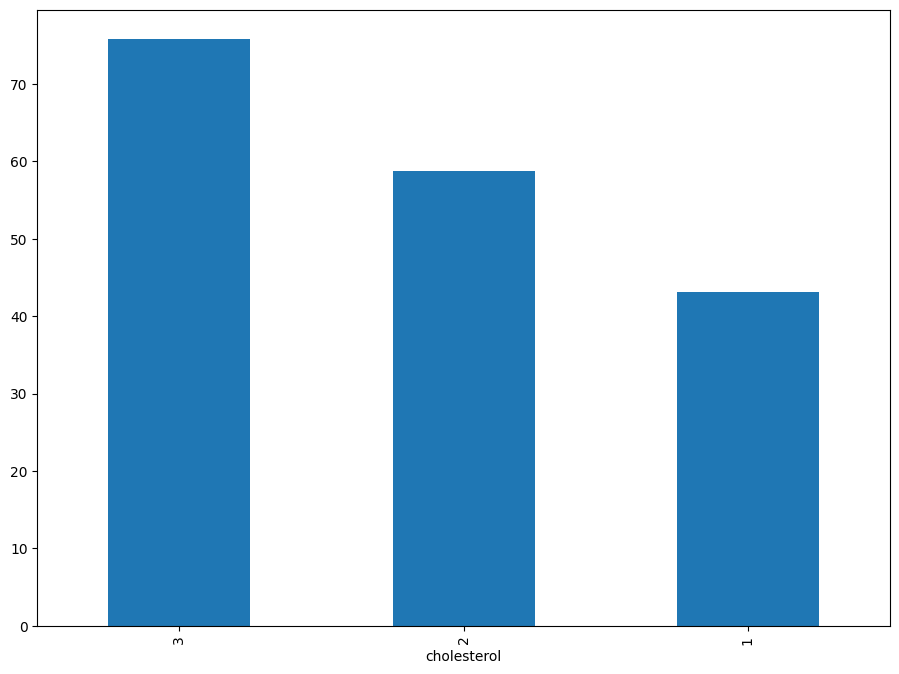

In [62]:
temp = df.groupby('cholesterol').cardio.mean().sort_values(ascending = False)*100
temp.plot.bar()

There is a clear positive correlation between cholesterol levels and the incidence of cardiovascular disease in the dataset. As cholesterol levels increase, so does the proportion of individuals with CVD, which aligns with established medical understanding that high cholesterol is a major risk factor for heart disease. 

<Axes: xlabel='gluc'>

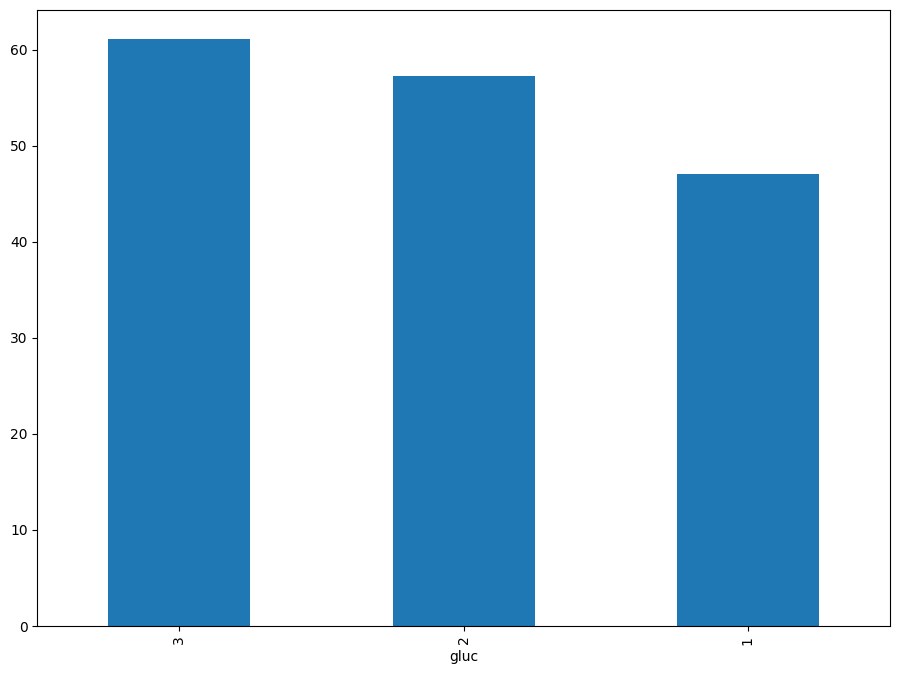

In [63]:
temp = df.groupby('gluc').cardio.mean().sort_values(ascending = False)*100
temp.plot.bar()

There is a clear positive correlation between glucose levels and the incidence of cardiovascular disease in the dataset. As blood glucose levels increase, so does the proportion of individuals with CVD. 

<Axes: xlabel='gender'>

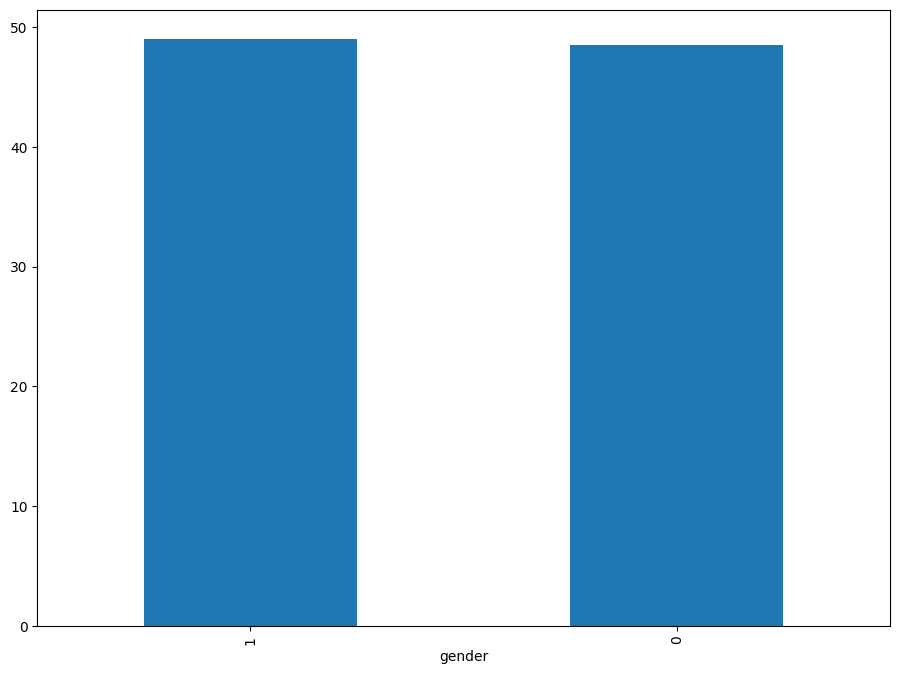

In [64]:
temp = df.groupby('gender').cardio.mean().sort_values(ascending = False)*100
temp.plot.bar()

Gender 1 (Female): The bar indicates the percentage of females who have cardiovascular disease. The chart shows that approximately 50% of females in the dataset have CVD.

Gender 0 (Male): Similarly, the bar for males shows that around 50% of males in the dataset have CVD.

<Axes: xlabel='smoke'>

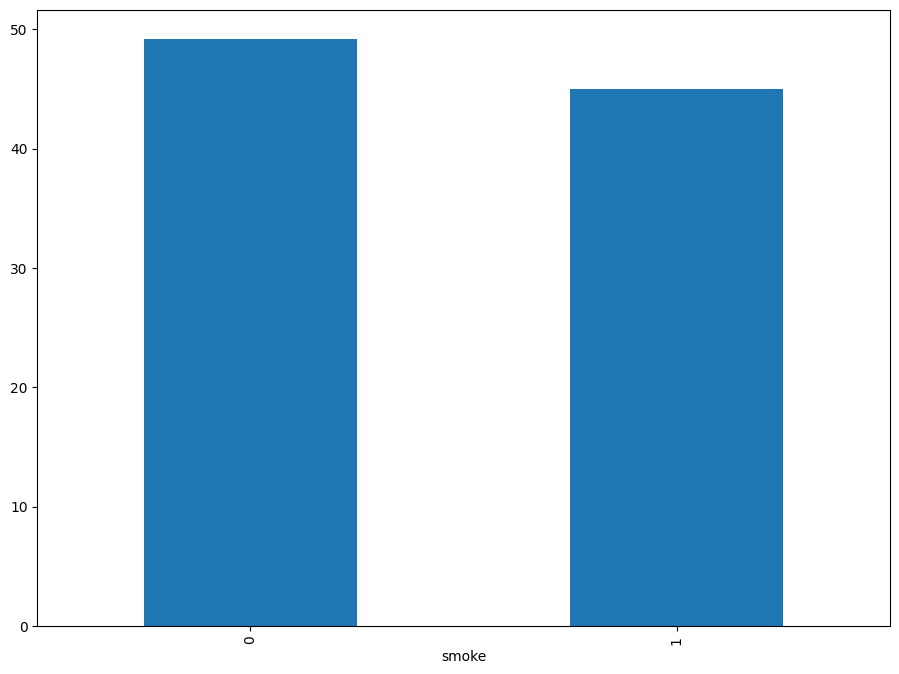

In [45]:
temp = df.groupby('smoke').cardio.mean().sort_values(ascending = False)*100
temp.plot.bar()

<Axes: xlabel='alco'>

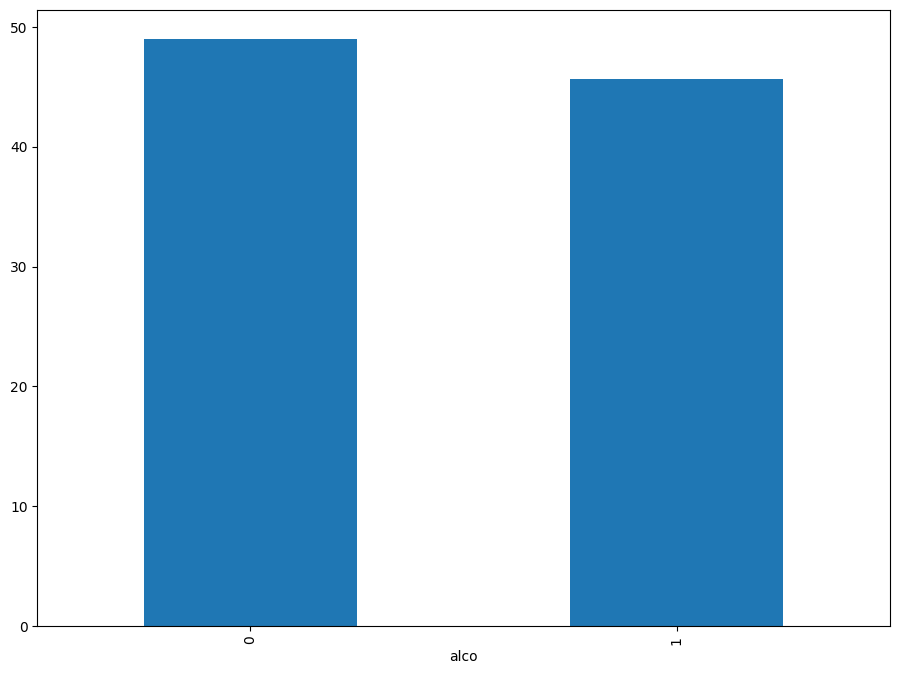

In [46]:
temp = df.groupby('alco').cardio.mean().sort_values(ascending = False)*100
temp.plot.bar()

<Axes: xlabel='active'>

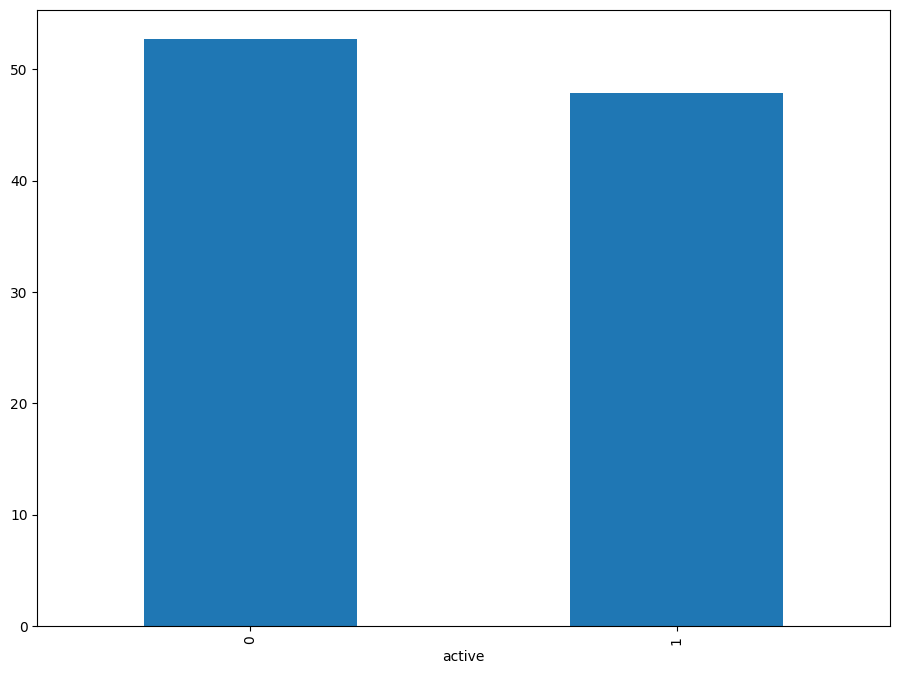

In [47]:
temp = df.groupby('active').cardio.mean().sort_values(ascending = False)*100
temp.plot.bar()

* The heatmap provided illustrates the percentage of individuals with cardiovascular disease (CVD) (cardio = 1) across different height and weight ranges. Here's how to interpret it:



 Interpretation:

- **X-axis (Weight Range in kg):** This axis represents the weight of individuals divided into bins ranging from 40 kg to 180 kg.

- **Y-axis (Height Range in cm):** This axis represents the height of individuals divided into bins ranging from 140 cm to 200 cm.

- **Color Scale (Percentage of People with CVD):** The color intensity indicates the percentage of people within each height and weight bin who have cardiovascular disease. Darker shades of blue represent higher percentages, while lighter shades represent lower percentages.

 Key Observations:

1. **Lower Weight and Higher Height Combinations:**
   - Individuals who are taller (above 175 cm) and have lower weight (less than 85 kg) show a lower percentage of CVD, indicated by the lighter colors in the top-left section of the heatmap.

2. **Higher Weight and Shorter Height Combinations:**
   - As weight increases, particularly in the range of 75 kg to 110 kg, and height decreases (especially below 165 cm), the percentage of individuals with CVD increases, shown by the darker shades of blue.

3. **Critical Weight and Height Combinations:**
   - The highest percentages of CVD seem to occur in individuals who fall into the 160-170 cm height range and weigh between 80-100 kg. This combination exhibits a significant concentration of darker blue shades.

The heatmap suggests that individuals with a higher weight relative to their height are more likely to have cardiovascular disease. This aligns with general health findings that indicate higher body mass index (BMI) and obesity levels are correlated with increased risks of cardiovascular conditions. The heatmap provides a clear visual representation of these relationships, making it easier to identify height-weight combinations that might be at higher risk.

C:\Users\Administrador\AppData\Local\Temp\ipykernel_9264\2886038008.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cardio_counts= weight_height_df.groupby(['height_bin', 'weight_bin'])['cardio'].mean() * 100


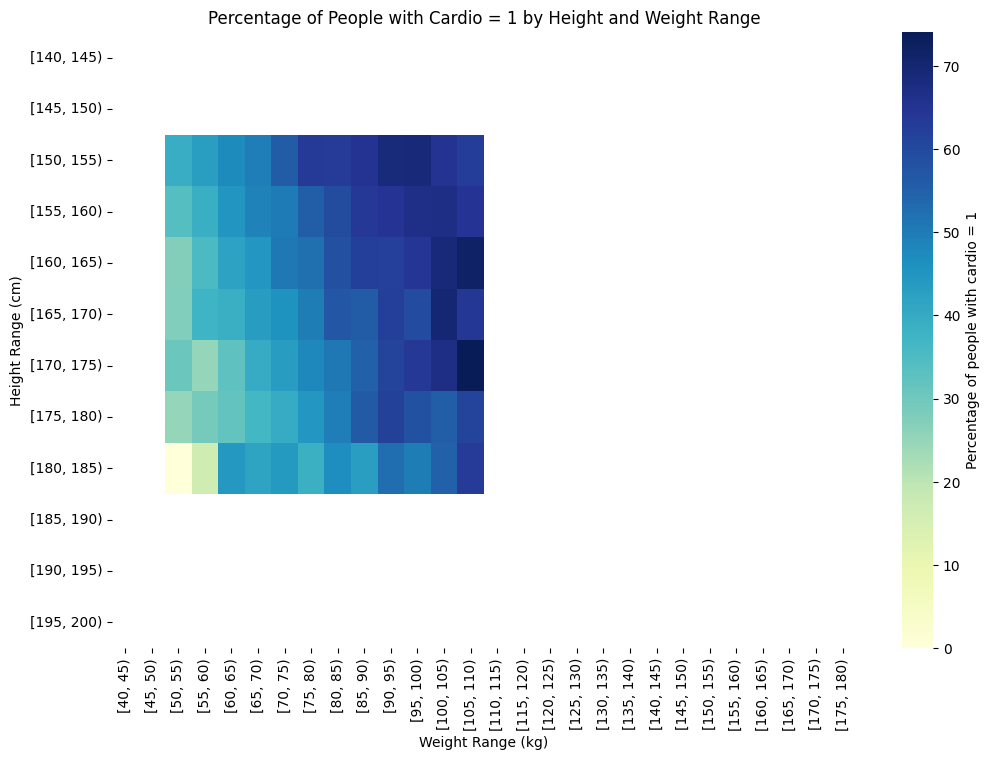

In [65]:
weight_height_df = df.copy()

height_bins = range(140, 201, 5) 
weight_bins = range(40, 181, 5)   

weight_height_df['height_bin'] = pd.cut(weight_height_df['height'], bins=height_bins, right=False)
weight_height_df['weight_bin'] = pd.cut(weight_height_df['weight'], bins=weight_bins, right=False)
cardio_counts= weight_height_df.groupby(['height_bin', 'weight_bin'])['cardio'].mean() * 100
heatmap_data = cardio_counts.unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', fmt=".1f", cbar_kws={'label': 'Percentage of people with cardio = 1'})
plt.title('Percentage of People with Cardio = 1 by Height and Weight Range')
plt.xlabel('Weight Range (kg)')
plt.ylabel('Height Range (cm)')
plt.show()

#### Interpretation of the Chart:

- **X-Axis (Percentage):** Represents the percentage of individuals within each cholesterol category who have (in red) or do not have (in green) cardiovascular disease.

- **Y-Axis (Cholesterol Level):** Divides the population into three cholesterol level categories:
  - **Normal**
  - **Above Normal**
  - **Well Above Normal**

- **Stacked Bars:** Each bar is split into two sections:
  - The **green** section shows the percentage of people within that cholesterol category who do **not** have CVD.
  - The **red** section shows the percentage of people within that cholesterol category who **do** have CVD.

#### Key Observations:

1. **Normal Cholesterol:**
   - **56.8%** of individuals with normal cholesterol levels do not have CVD.
   - **43.2%** of individuals with normal cholesterol levels do have CVD.

2. **Above Normal Cholesterol:**
   - The percentage of individuals with CVD increases, with **58.7%** having CVD.
   - **41.3%** of individuals with above normal cholesterol levels do not have CVD.

3. **Well Above Normal Cholesterol:**
   - The percentage of individuals with CVD is the highest in this category, with **75.8%** having CVD.
   - Only **24.2%** of individuals with well above normal cholesterol levels do not have CVD.

#### Insights:

- As cholesterol levels increase from normal to well above normal, the proportion of individuals with cardiovascular disease increases significantly.
- This trend suggests a strong correlation between higher cholesterol levels and the likelihood of having cardiovascular disease.


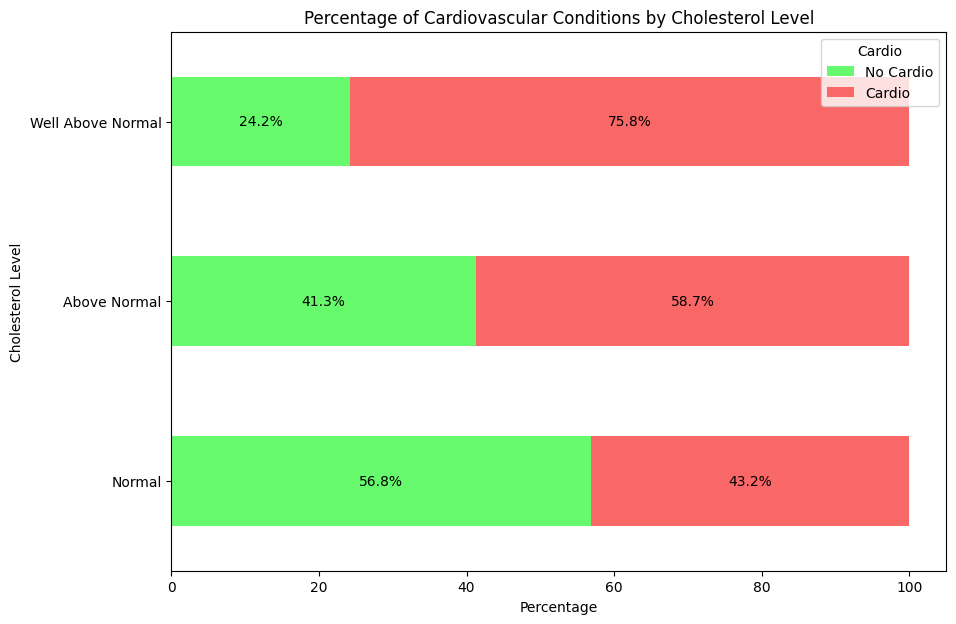

In [66]:
cholesterol_counts = df.groupby(['cholesterol', 'cardio']).size().reset_index(name='count')
total_counts = cholesterol_counts.groupby('cholesterol')['count'].sum().reset_index(name='total')
cholesterol_counts = cholesterol_counts.merge(total_counts, on='cholesterol')
cholesterol_counts['percentage'] = (cholesterol_counts['count'] / cholesterol_counts['total']) * 100

pivot_df = cholesterol_counts.pivot(index='cholesterol', columns='cardio', values='percentage')

colors = {0: '#67fa6c', 1: '#fa6767'}
ax = pivot_df.plot(kind='barh', stacked=True, figsize=(10, 7), color=[colors[col] for col in pivot_df.columns])

ax.set_ylabel('Cholesterol Level')
ax.set_xlabel('Percentage')
ax.set_title('Percentage of Cardiovascular Conditions by Cholesterol Level')
ax.legend(title='Cardio', labels=['No Cardio', 'Cardio'])

for i, (index, row) in enumerate(pivot_df.iterrows()):
    total_width = row.sum()
    start = 0
    for col in pivot_df.columns:
        if row[col] > 0:
            ax.text(start + row[col] / 2, i, f'{row[col]:.1f}%', 
                    ha='center', va='center', color='black', fontsize=10)
        start += row[col]

plt.yticks(ticks=range(len(pivot_df.index)), labels=['Normal', 'Above Normal', 'Well Above Normal'], rotation=0)
plt.show()

#### Interpretation of the Chart:

- **X-Axis (Percentage):** Represents the percentage of individuals within each glucose level category who have (in red) or do not have (in green) cardiovascular disease.

- **Y-Axis (Glucose Level):** Divides the population into three glucose level categories:
  - **Normal**
  - **Above Normal**
  - **Well Above Normal**

- **Stacked Bars:** Each bar is divided into two sections:
  - The **green** section shows the percentage of people within that glucose level category who do **not** have CVD.
  - The **red** section shows the percentage of people within that glucose level category who **do** have CVD.

#### Key Observations:

1. **Normal Glucose:**
   - **53.0%** of individuals with normal glucose levels do not have CVD.
   - **47.0%** of individuals with normal glucose levels do have CVD.

2. **Above Normal Glucose:**
   - The percentage of individuals with CVD increases to **57.3%**.
   - **42.7%** of individuals with above normal glucose levels do not have CVD.

3. **Well Above Normal Glucose:**
   - The highest percentage of individuals with CVD is found in this category, with **61.1%** having CVD.
   - **38.9%** of individuals with well above normal glucose levels do not have CVD.

#### Insights:

- As glucose levels increase from normal to well above normal, the proportion of individuals with cardiovascular disease also increases.
- This pattern suggests a strong correlation between higher glucose levels and the likelihood of having cardiovascular disease, similar to the trend observed with cholesterol levels.

This chart reinforces the importance of monitoring and managing glucose levels to reduce the risk of cardiovascular disease.

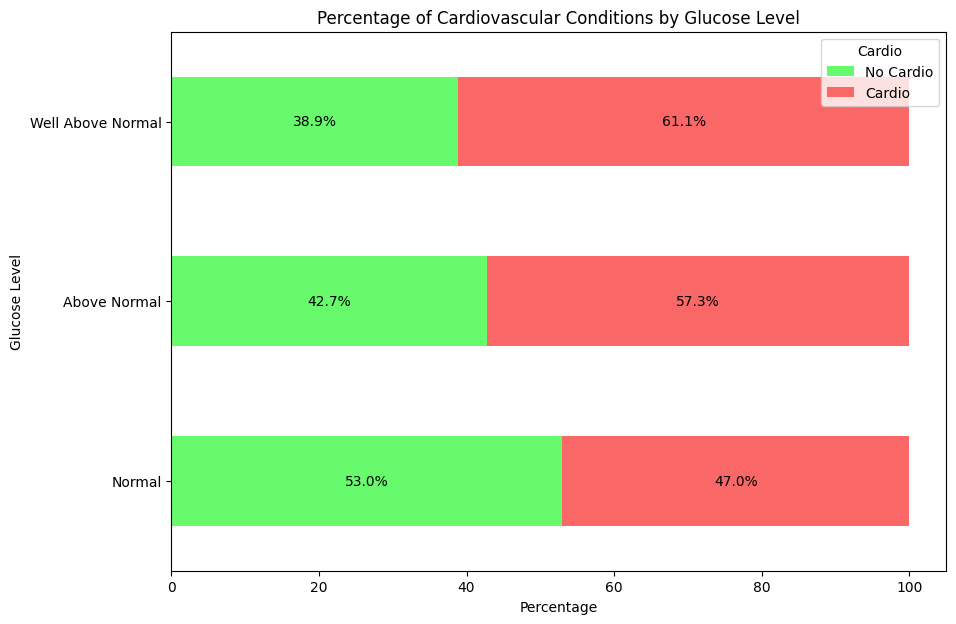

In [68]:
glucose_counts = df.groupby(['gluc', 'cardio']).size().reset_index(name='count')
total_counts = glucose_counts.groupby('gluc')['count'].sum().reset_index(name='total')
glucose_counts = glucose_counts.merge(total_counts, on='gluc')
glucose_counts['percentage'] = (glucose_counts['count'] / glucose_counts['total']) * 100

pivot_df = glucose_counts.pivot(index='gluc', columns='cardio', values='percentage')


colors = {0: '#67fa6c', 1: '#fa6767'}

ax = pivot_df.plot(kind='barh', stacked=True, figsize=(10, 7), color=[colors[col] for col in pivot_df.columns])

ax.set_ylabel('Glucose Level')
ax.set_xlabel('Percentage')
ax.set_title('Percentage of Cardiovascular Conditions by Glucose Level')
ax.legend(title='Cardio', labels=['No Cardio', 'Cardio'])

for i, (index, row) in enumerate(pivot_df.iterrows()):
    total_width = row.sum()
    start = 0
    for col in pivot_df.columns:
        if row[col] > 0:
            ax.text(start + row[col] / 2, i, f'{row[col]:.1f}%', 
                    ha='center', va='center', color='black', fontsize=10)
        start += row[col]

plt.yticks(ticks=range(len(pivot_df.index)), labels=['Normal', 'Above Normal', 'Well Above Normal'], rotation=0)
plt.show()

A new column called ***blood_pressure*** was created in the DataFrame to classify individuals' blood pressure levels based on their systolic (ap_hi) and diastolic (ap_lo) blood pressure measurements. This was done to enable a combined analysis of these two variables.

***Blood pressure:***
- **1:** Normal
- **2:** Elevated
- **3:** High Blood Pressure Stage 1
- **4:** High Blood Pressure Stage 2
- **5:** Hypertensive Crisis


In [69]:
def classify_blood_pressure(row):
    if row['ap_hi'] < 120 and row['ap_lo'] < 80:
        return 1  # NORMAL
    elif 120 <= row['ap_hi'] <= 129 and row['ap_lo'] < 80:
        return 2  # ELEVATED
    elif (130 <= row['ap_hi'] <= 139) or (80 <= row['ap_lo'] <= 89):
        return 3  # HIGH BLOOD PRESSURE STAGE 1
    elif (140 <= row['ap_hi'] <= 180) or ( 90 <= row['ap_lo'] <= 120):
        return 4  # HIGH BLOOD PRESSURE STAGE 2
    elif row['ap_hi'] > 180 or row['ap_lo'] > 120:
        return 5  # HYPERTENSIVE CRISIS
    else:
        return None

df['blood_pressure'] = df.apply(classify_blood_pressure, axis=1)

print(df['blood_pressure'].value_counts())

df

blood_pressure
3    36662
4    13002
1     7587
2     2886
Name: count, dtype: int64


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_class,bp_cat,pulse_press,blood_pressure
0,0,50,0,168,62.0,110,80,1,1,0,0,1,0,21.967120,2,1,30,3
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,4,3,50,4
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,2,2,60,3
3,3,48,0,169,82.0,150,100,1,1,0,0,1,1,28.710479,3,3,50,4
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,2,0,40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,53,1,172,70.0,130,90,1,1,0,0,1,1,23.661439,2,2,40,3
69994,99992,57,1,165,80.0,150,80,1,1,0,0,1,1,29.384757,3,3,70,3
69995,99993,52,0,168,76.0,120,80,1,1,1,0,1,0,26.927438,3,1,40,3
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,3,2,55,3


In the pie charts, the percentages represent the proportion of people suffering from cardiovascular diseases.

The higher the blood pressure, the greater the probability of having cardiovascular disease. It can be observed that among individuals with normal blood pressure, 23.6% suffer from cardiovascular diseases. On the other hand, individuals with high blood pressure in Stage 4 have a 79.5% probability of suffering from these diseases.

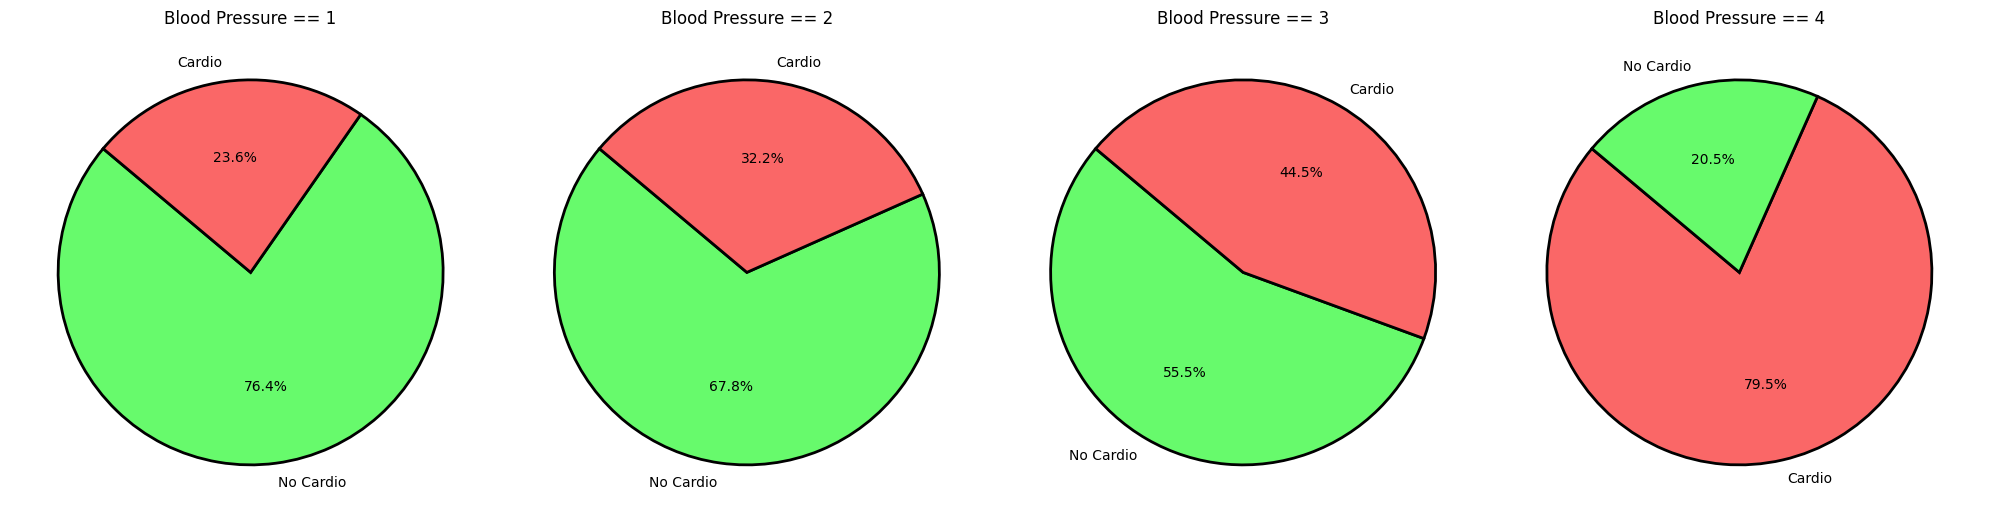

In [73]:
ordered_categories = [1, 2, 3, 4]
label_mapping = {0: 'No Cardio', 1: 'Cardio'}

fig, axes = plt.subplots(nrows=1, ncols=len(ordered_categories), figsize=(20, 6))

for i, bp in enumerate(ordered_categories):
    df_filtered = df[df['blood_pressure'] == bp]
    cardio_counts = df_filtered['cardio'].value_counts()

    colors = ['#67fa6c' if x == 0 else '#fa6767' for x in cardio_counts.index]
    wedgeprops = {'edgecolor': 'black', 'linewidth': 2}
    labels = [label_mapping.get(x, x) for x in cardio_counts.index]

    axes[i].pie(cardio_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops=wedgeprops)
    axes[i].set_title(f'Blood Pressure == {bp}')

plt.tight_layout()
plt.show()

Graphs have been created to illustrate the percentage of people with cardiovascular diseases based on their blood pressure, activity level, smoking habits, and alcohol consumption. At first glance, these factors seem to exhibit similar behavior. Interestingly, being inactive, not consuming alcohol, and not smoking are associated with a slightly higher probability of cardiovascular disease compared to their counterparts, which might seem counterintuitive. However, this becomes less significant in Stage 2 hypertension, where the risk remains high regardless of physical activity, smoking, or alcohol consumption.

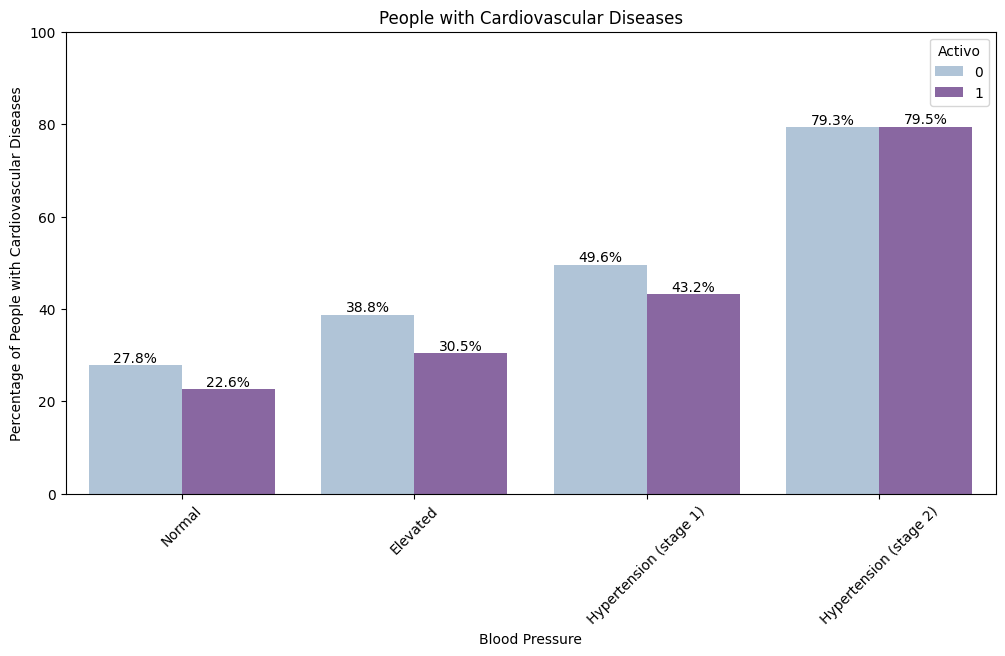

In [74]:
total_counts = df.groupby(['blood_pressure', 'active']).size().reset_index(name='count')
cardio_counts = df[df['cardio'] == 1].groupby(['blood_pressure', 'active']).size().reset_index(name='cardio_count')
merged_df = pd.merge(total_counts, cardio_counts, on=['blood_pressure', 'active'], how='left').fillna(0)
merged_df['percentage'] = (merged_df['cardio_count'] / merged_df['count']) * 100

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=merged_df, x='blood_pressure', y='percentage', hue='active', palette='BuPu')

for p in bar_plot.patches:
    height = p.get_height()
    if height > 0.1:
        bar_plot.annotate(f'{height:.1f}%',
                          (p.get_x() + p.get_width() / 2., height),
                          ha='center', va='center',
                          xytext=(0, 5),
                          textcoords='offset points')

plt.title('People with Cardiovascular Diseases')
plt.xlabel('Blood Pressure')
plt.ylabel('Percentage of People with Cardiovascular Diseases')
plt.ylim(0, 100)
plt.legend(title='Activo')

labels = {
    0: 'Normal',
    1: 'Elevated',
    2: 'Hypertension (stage 1)',
    3: 'Hypertension (stage 2)'
}

plt.xticks(ticks=list(labels.keys()), labels=list(labels.values()), rotation=45)

plt.show()

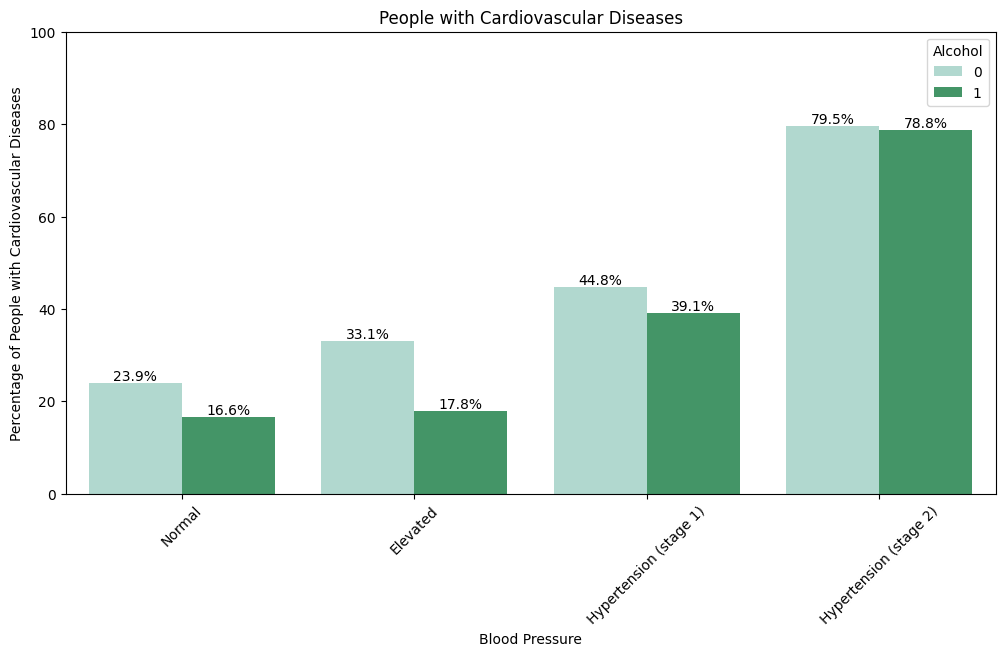

In [80]:
total_counts = df.groupby(['blood_pressure', 'alco']).size().reset_index(name='count')
cardio_counts = df[df['cardio'] == 1].groupby(['blood_pressure', 'alco']).size().reset_index(name='cardio_count')
merged_df = pd.merge(total_counts, cardio_counts, on=['blood_pressure', 'alco'], how='left').fillna(0)
merged_df['percentage'] = (merged_df['cardio_count'] / merged_df['count']) * 100

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=merged_df, x='blood_pressure', y='percentage', hue='alco', palette='BuGn')

for p in bar_plot.patches:
    height = p.get_height()
    if height > 0.1:
        bar_plot.annotate(f'{height:.1f}%',
                          (p.get_x() + p.get_width() / 2., height),
                          ha='center', va='center',
                          xytext=(0, 5),
                          textcoords='offset points')

plt.title('People with Cardiovascular Diseases')
plt.xlabel('Blood Pressure')
plt.ylabel('Percentage of People with Cardiovascular Diseases')
plt.ylim(0, 100)
plt.legend(title='Alcohol')

labels = {
    0: 'Normal',
    1: 'Elevated',
    2: 'Hypertension (stage 1)',
    3: 'Hypertension (stage 2)'
}

plt.xticks(ticks=list(labels.keys()), labels=list(labels.values()), rotation=45)

plt.show()

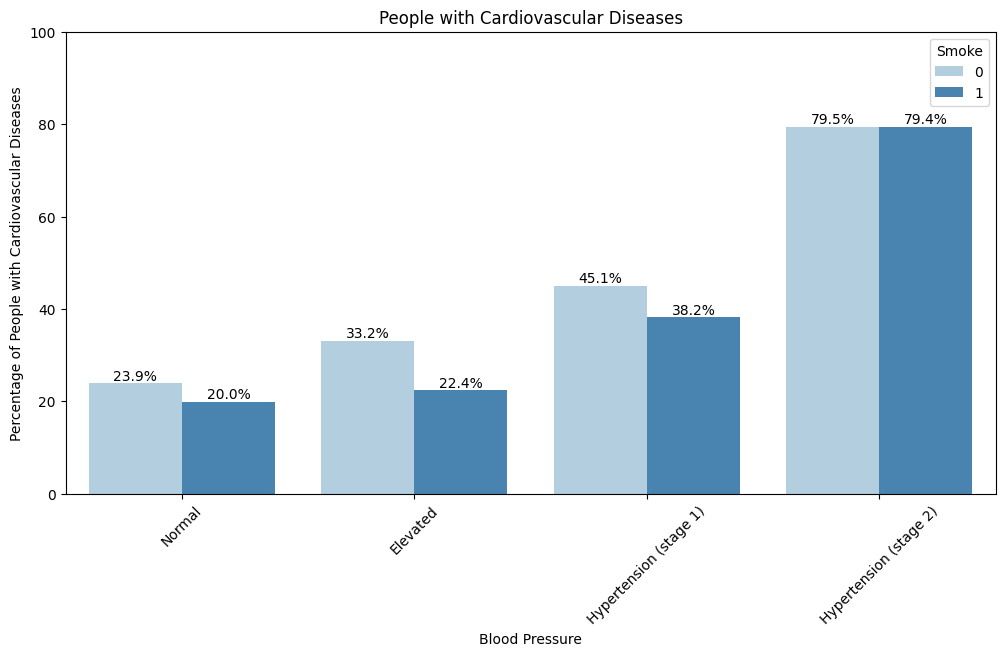

In [82]:
total_counts = df.groupby(['blood_pressure', 'smoke']).size().reset_index(name='count')
cardio_counts = df[df['cardio'] == 1].groupby(['blood_pressure', 'smoke']).size().reset_index(name='cardio_count')
merged_df = pd.merge(total_counts, cardio_counts, on=['blood_pressure', 'smoke'], how='left').fillna(0)
merged_df['percentage'] = (merged_df['cardio_count'] / merged_df['count']) * 100

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=merged_df, x='blood_pressure', y='percentage', hue='smoke', palette='Blues')

for p in bar_plot.patches:
    height = p.get_height()
    if height > 0.1:
        bar_plot.annotate(f'{height:.1f}%',
                          (p.get_x() + p.get_width() / 2., height),
                          ha='center', va='center',
                          xytext=(0, 5),
                          textcoords='offset points')

plt.title('People with Cardiovascular Diseases')
plt.xlabel('Blood Pressure')
plt.ylabel('Percentage of People with Cardiovascular Diseases')
plt.ylim(0, 100)
plt.legend(title='Smoke')

labels = {
    0: 'Normal',
    1: 'Elevated',
    2: 'Hypertension (stage 1)',
    3: 'Hypertension (stage 2)'
}

plt.xticks(ticks=list(labels.keys()), labels=list(labels.values()), rotation=45)

plt.show()